# Notebook for generating figures for T4CGAp5 evolving populations
written by Sri Srikant
[211130] Intiating the notebook

In [2]:
##Libaries and packages used in this notebook. Version information recorded where appropriate.
import os
import sys
import shutil
import glob
import subprocess

import traceback
import re
import collections

import csv
import pandas as pd

from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

##Set pdf ouput of matplotlib to have embedded fonts that are editable in Illustrator
plt.rcParams['pdf.fonttype'] = 42

#Directories
home_dir = os.path.join("/home", "ssrikant")
data_dir = os.path.join(home_dir, "WindowsFiles", "postdoc_data", "Computational", "Appelmans", "Ap05_T4CG")
print("List of directories of Computational analysis:")
print("\n".join([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]))

#Magic commands
%matplotlib inline

List of directories of Computational analysis:
20210314_T4CGAp5_61p4-locus-image
20210411_T4CGAp5_coverage-maps
20210802_ECOR17-defense-genes
20211102_hosts-defense-genes
20211130_T4CGAp5_evo-pop
20211201_T4-gene-classification_MandyL
20220124_T4CGAp5p25_genome-deletions


In [11]:
##Funstions to be used
def genome_increase_median(row):
    return(round(row['MedianAmplificationSize']-row['RepeatSize']))
def genome_increase_25quartile(row):
    return(round(row['25QuartileAmplification']-row['RepeatSize']))
def genome_increase_75quartile(row):
    return(round(row['75QuartileAmplification']-row['RepeatSize']))

### Figure 4 heatmap for evolving populations

In [2]:
##Import csv of data
csv_data_dir = os.path.join(data_dir, "20211130_T4CGAp5_evo-pop")
csv_file_list = [f for f in os.listdir(csv_data_dir) if f.endswith(".csv")]
print("\n".join(csv_file_list))

evol_pop_freq_frame = pd.read_csv(os.path.join(csv_data_dir, "20211130_T4CGAp5_evolving-populations.csv"), sep=",")
print(evol_pop_freq_frame.columns.values)

evol_pop_titer_frame = pd.read_csv(os.path.join(csv_data_dir, "20211130_T4CGAp5_evolving-populations-raw-titer.csv"), sep=",")
print(evol_pop_titer_frame.columns.values)

##Extract data as 2d array
heatmap_2d_freq_data = evol_pop_freq_frame[['pop00', 'pop01', 'pop02', 'pop03', 'pop04', 'pop05']].values.transpose()
heatmap_2d_titer_data = evol_pop_titer_frame[['pop00', 'pop01', 'pop02', 'pop03', 'pop04', 'pop05']].values.transpose()
print(heatmap_2d_titer_data)

20211130_T4CGAp5_evolving-populations.csv
20211130_T4CGAp5_evolving-populations-raw-titer.csv
20211130_T4CGAp5p25-clones_host-spot-test.csv
20211211_T4CGAp5p25-clones_host-spot-test.csv
['Round' 'pop00' 'pop01' 'pop02' 'pop03' 'pop04' 'pop05']
['Round' 'pop00' 'pop01' 'pop02' 'pop03' 'pop04' 'pop05']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 3 3 4 3 4 4 4 3 4 5 5 1 3 3 3 3 3 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 5 4 1 1 3 5 4 4 4]
 [0 0 0 3 4 4 4 4 4 5 5 5 4 5 5 5 5 5 5 4 4 4 3 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 5 4 3 4 4 3 3 3 4]
 [0 0 4 3 4 4 3 4 4 4 4 4 4 4 5 4 4 5 4 4 4 4 3 3 3 4]]


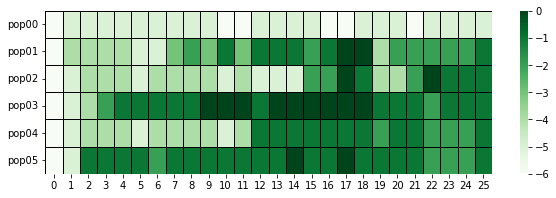

In [3]:
##Plotting the evo-pop-freq as a heatmap.
fig1, ax1 = plt.subplots(1, 1, figsize=(10,3))
ax1 = sns.heatmap(heatmap_2d_freq_data, cmap="Greens", linewidth=1, linecolor='Black', yticklabels=['pop00', 'pop01', 'pop02', 'pop03', 'pop04', 'pop05'])
#savefig(os.path.join(csv_data_dir, "T4CGAp5p25_evo-pop-freq_Figure4_220101.pdf"), dpi=300, transparent=True)

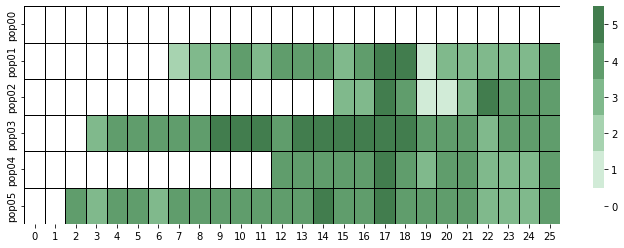

In [19]:
##Plotting the evo-pop-freq as a heatmap.
green_palette = sns.cubehelix_palette(start=2, rot=0, dark=0.4, light=1)
fig2, ax2 = plt.subplots(1, 1, figsize=(12,4))
ax2 = sns.heatmap(heatmap_2d_titer_data, cmap=green_palette, linewidth=0.5, linecolor='Black', yticklabels=['pop00', 'pop01', 'pop02', 'pop03', 'pop04', 'pop05'], vmin=-0.5, vmax=5.5)
#savefig(os.path.join(csv_data_dir, "T4CGAp5p25_evo-pop-titer_Figure4_220101.pdf"), dpi=300, transparent=True)

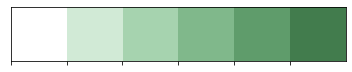

In [7]:
sns.palplot(sns.cubehelix_palette(start=2, rot=0, dark=0.4, light=1))

### Figure 6 heatmap for T4CGAp5p25-clones host-spot-assay

In [2]:
##Import csv of data
csv_data_dir = os.path.join(data_dir, "20211130_T4CGAp5_evo-pop")
csv_file_list = [f for f in os.listdir(csv_data_dir) if f.endswith(".csv")]
print("\n".join(csv_file_list))

#evol_cl_host_test_frame = pd.read_csv(os.path.join(csv_data_dir, "20211130_T4CGAp5p25-clones_host-spot-test.csv"), sep=",")
#evol_cl_host_test_frame = pd.read_csv(os.path.join(csv_data_dir, "20211211_T4CGAp5p25-clones_host-spot-test.csv"), sep=",")
evol_cl_host_test_frame = pd.read_csv(os.path.join(csv_data_dir, "20220123_T4CGAp5p25-clones_host-spot-test.csv"), sep=",")
print(evol_cl_host_test_frame.columns.values)

##Extract data as 2d array
heatmap_2d_host_relEOP_data = evol_cl_host_test_frame[['MG1655','MG1655+toxIN','E. coli str. C','MG1655 ?-lysogen','ECOR13','ECOR16','ECOR17','ECOR71']].values
phage_list = evol_cl_host_test_frame[['Phage']].values.transpose().tolist()[0]
print(phage_list)
print(heatmap_2d_host_relEOP_data)

20211130_T4CGAp5_evolving-populations.csv
20211130_T4CGAp5_evolving-populations-raw-titer.csv
20211130_T4CGAp5p25-clones_host-spot-test.csv
20211211_T4CGAp5p25-clones_host-spot-test.csv
20220123_T4CGAp5p25-clones_host-spot-test.csv
['Phage' 'MG1655' 'MG1655+toxIN' 'E. coli str. C' 'MG1655 ?-lysogen'
 'ECOR13' 'ECOR16' 'ECOR17' 'ECOR71']
['T4 anc', 'ctrl evo / cl01', 'evo 1 / cl01', 'evo 2 / cl01', 'evo 3 / cl01', 'evo 4 / cl01', 'evo 5 / cl03']
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0 -6 -5]
 [ 0  6  0  0  0  0 -5  0]
 [ 0  6 -3 -5  0  0 -5 -5]
 [ 0  6  0  0  0  0  0  0]
 [ 0  5 -4  0  0  0 -6  0]]


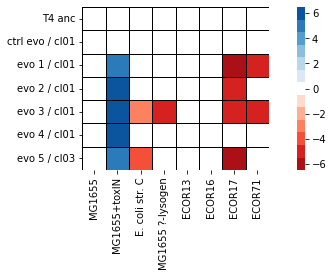

In [4]:
##Plotting the evo-pop-freq as a heatmap.
###coolwarm_r is Blue-Grey-Red divergent palette.
heatmap_colors = sns.color_palette("Reds_r", 6) + [matplotlib.colors.to_rgb('white')] + sns.color_palette("Blues", 6)
fig3, ax3 = plt.subplots(1, 1, figsize=(10,3))
ax3 = sns.heatmap(heatmap_2d_host_relEOP_data, cmap=heatmap_colors, linewidth=1, linecolor='Black', square=True, vmin=-6.5, vmax=6.5,
                  xticklabels=['MG1655','MG1655+toxIN','E. coli str. C','MG1655 ?-lysogen','ECOR13','ECOR16','ECOR17','ECOR71'], yticklabels=phage_list)
#savefig(os.path.join(csv_data_dir, "T4CGAp5p25-clones_host-relEOP_Figure6_220123.pdf"), dpi=300, transparent=True)

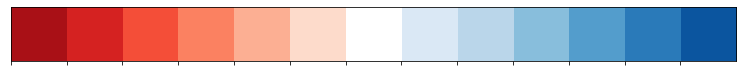

In [30]:
sns.palplot(sns.color_palette("Reds_r", 6) + [matplotlib.colors.to_rgb('white')] + sns.color_palette("Blues", 6))

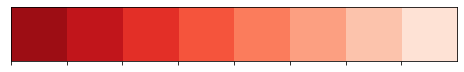

In [3]:
sns.palplot(sns.color_palette("Reds_r", 8))

### Figure 5 scatter for T4CGAp5p25-clones deletion-size vs inferred amplification size

In [12]:
##Import csv of data
csv_data_dir = os.path.join(data_dir, "20210411_T4CGAp5_coverage-maps")
csv_file_list = [f for f in os.listdir(csv_data_dir) if f.endswith(".csv")]
print("\n".join(csv_file_list))

#evol_cl_host_test_frame = pd.read_csv(os.path.join(csv_data_dir, "20211130_T4CGAp5p25-clones_host-spot-test.csv"), sep=",")
#evo_clone_deletion_amplification = pd.read_csv(os.path.join(csv_data_dir, "20211130_T4CGAp5p25-clones05_deletion_amp-size.csv"), sep=",")
evo_clone_deletion_amplification = pd.read_csv(os.path.join(csv_data_dir, "20220401_T4CGAp5p25-clones05_deletion_amp-size.csv"), sep=",")
print(evo_clone_deletion_amplification.columns.values)

evo_clone_deletion_amplification['MedianGenomeIncrease'] = evo_clone_deletion_amplification.apply(lambda row: genome_increase_median(row), axis=1)
evo_clone_deletion_amplification['25QuartileGenomeIncrease'] = evo_clone_deletion_amplification.apply(lambda row: genome_increase_25quartile(row), axis=1)
evo_clone_deletion_amplification['75QuartileGenomeIncrease'] = evo_clone_deletion_amplification.apply(lambda row: genome_increase_75quartile(row), axis=1)

#Display dataframe
evo_clone_deletion_amplification

20211130_T4CGAp5p25-clones05_deletion_amp-size.csv
20220401_T4CGAp5p25-clones05_deletion_amp-size.csv
['Strain' 'RepeatSize' 'MedianAmplificationSize' '25QuartileAmplification'
 '75QuartileAmplification' 'DeletionSize']


,Strain,RepeatSize,MedianAmplificationSize,25QuartileAmplification,75QuartileAmplification,DeletionSize,MedianGenomeIncrease,25QuartileGenomeIncrease,75QuartileGenomeIncrease
0,T4CGAp5p25p00p01,1601,1734.873363,1328.132718,2340.833916,0,134,-273,740
1,T4CGAp5p25p01p01,1601,12989.967170,9658.754419,19141.254200,10812,11389,8058,17540
2,T4CGAp5p25p02p01,1293,11695.822230,8673.104609,15167.458300,10793,10403,7380,13874
3,T4CGAp5p25p03p01,673,7632.783388,5571.489942,10003.428680,10919,6960,4898,9330
4,T4CGAp5p25p04p01,509,8643.257345,7222.531446,10567.029970,7434,8134,6714,10058
5,T4CGAp5p25p05p03,512,8330.056005,6303.864703,12593.470500,5078,7818,5792,12081


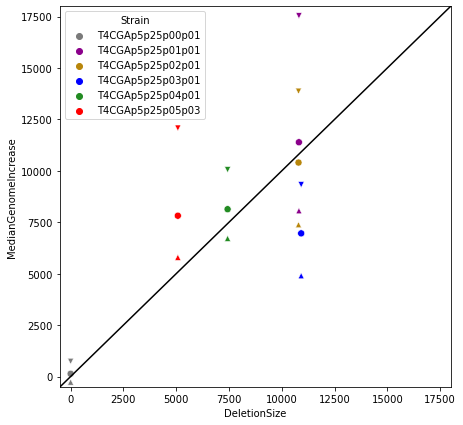

In [29]:
##Plot scatter of genome increase by amplification vs deletion sizes.
##Palette that is used in Figure 4 as colors for different evolving populations
plot_color_palette = [sns.color_palette("Greys", 4)[2]] + [matplotlib.colors.to_rgb("darkmagenta")] + [matplotlib.colors.to_rgb("darkgoldenrod")] + [matplotlib.colors.to_rgb("blue")] + [matplotlib.colors.to_rgb("forestgreen")] + [matplotlib.colors.to_rgb("red")]

fig4, ax4 = plt.subplots(1, 1, figsize=(7,7))
#ax4 = sns.scatterplot(x='DeletionSize', y='MeanAmplification', hue='Strain', data=evo_clone_deletion_amplification, marker='o')
ax4 = sns.scatterplot(x='DeletionSize', y='MedianGenomeIncrease', hue='Strain', data=evo_clone_deletion_amplification, palette=plot_color_palette, marker='o', s=50, legend='brief')
ax4 = sns.scatterplot(x='DeletionSize', y='25QuartileGenomeIncrease', hue='Strain', data=evo_clone_deletion_amplification, palette=plot_color_palette, marker='^', legend=False)
ax4 = sns.scatterplot(x='DeletionSize', y='75QuartileGenomeIncrease', hue='Strain', data=evo_clone_deletion_amplification, palette=plot_color_palette, marker='v', legend=False)
ax4.set_ylim(-500,18000)
ax4.set_xlim(-500,18000)

#Adding identity line
ax4.plot([0, 1], [0, 1], color='black', transform=ax4.transAxes)

savefig(os.path.join(csv_data_dir, "T4CGAp5p25-clones_deletion-amplification-size_Figure5_220401.pdf"), dpi=300, transparent=True)